In [113]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr, kurtosis, skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [114]:
df = pd.read_csv('dataset/Monthly_Avg.csv')
df.head()

,DATE,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,1/31/1978,207.8,129.2,NaN,104.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/1978,227.3,139.5,"44,853.10",113.3,269.5,378.8,"1,852.80",NaN,NaN,754.1,"141,796.40",869.4,"4,582.20",NaN,NaN,"111,186.60",NaN,197,198.6
2,3/31/1978,245.7,151.3,"49,213.20",122.5,293.2,410.6,"2,010.40",NaN,NaN,822.3,"153,099.60",939.1,"4,949.50",NaN,NaN,"118,284.00",NaN,209.9,216.7
3,4/28/1978,242.1,149.3,"49,989.40",118.8,284.2,407.3,"1,974.90",NaN,NaN,810.1,"151,068.50",926.2,"4,884.50",NaN,NaN,"116,507.10",NaN,204.4,215.9
4,5/31/1978,239.2,148.8,"51,707.20",115.4,274.2,410.5,"1,960.90",NaN,NaN,817.3,"149,744.30",919.9,"4,842.60",NaN,NaN,"115,555.90",NaN,202.8,215.8


In [115]:
# fungsi sliding window untuk membagi data menjadi input dan output
def sliding_window(data, window_size, step_size):
    X = []
    y = []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [116]:
# fungsi untuk membuat staistical features, untuk meningkatkan akurasi model
def create_features(data):
    X = []
    for i in range(len(data)):
        X.append([np.mean(data[i]), np.std(data[i]), np.median(data[i]), np.min(data[i]), np.max(data[i]), kurtosis(data[i]), skew(data[i])])
    return np.array(X)

In [117]:
# model untuk MLP (Multi Layer Perceptron)
def mlp_model(X_train, y_train, X_test, y_test):
    mlp = MLPRegressor(random_state=42, max_iter=1000)
    mlp.fit(X_train, y_train)
    # get the prediction
    y_pred = mlp.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [118]:
# model untuk KNN (K-Nearest Neighbors)
def knn_model(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    # get the prediction
    y_pred = knn.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [119]:
# model untuk decision tree
def dt_model(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    # get the prediction
    y_pred = dt.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [120]:
# model untuk SVR (Support Vector Regression)
def svr_model(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    # get the prediction
    y_pred = svr.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [121]:
# model untuk Random Forest
def rf_model(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    # get the prediction
    y_pred = rf.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    554 non-null    object
 1   USD     554 non-null    object
 2   EUR     554 non-null    object
 3   JPY     553 non-null    object
 4   GBP     554 non-null    object
 5   CAD     553 non-null    object
 6   CHF     553 non-null    object
 7   INR     553 non-null    object
 8   CNY     481 non-null    object
 9   TRY     505 non-null    object
 10  SAR     553 non-null    object
 11  IDR     553 non-null    object
 12  AED     553 non-null    object
 13  THB     553 non-null    object
 14  VND     422 non-null    object
 15  EGP     434 non-null    object
 16  KRW     553 non-null    object
 17  RUB     385 non-null    object
 18  ZAR     553 non-null    object
 19  AUD     553 non-null    object
dtypes: object(20)
memory usage: 86.7+ KB


In [123]:
df.isnull().sum()

DATE      0
USD       0
EUR       0
JPY       1
GBP       0
CAD       1
CHF       1
INR       1
CNY      73
TRY      49
SAR       1
IDR       1
AED       1
THB       1
VND     132
EGP     120
KRW       1
RUB     169
ZAR       1
AUD       1
dtype: int64

In [124]:
# preprocessing data

# convert date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
# set date as index
df.set_index('DATE', inplace=True)
# cukup ambil date dan idr saja
# df = df[['IDR']]
# hilangkan koma agar mata uang bisa diubah ke float
for column in df.columns:
    df[column] = df[column].str.replace(',', '')
# convert the object to float if possible and non object to NaN
df = df.apply(pd.to_numeric, errors='coerce')
# isi missing value dengan mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()


USD    0
EUR    0
JPY    0
GBP    0
CAD    0
CHF    0
INR    0
CNY    0
TRY    0
SAR    0
IDR    0
AED    0
THB    0
VND    0
EGP    0
KRW    0
RUB    0
ZAR    0
AUD    0
dtype: int64

In [125]:
df

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
DATE,,,,,,,,,,,,,,,,,,,
1978-01-31,207.8,129.2,91199.041049,104.6,924.535443,868.667269,39142.669078,5328.14948,3821.885347,2795.786257,7.332456e+06,2758.653526,23827.613924,1.691645e+07,9330.45023,8.035751e+05,43043.189351,7323.997288,964.135081
1978-02-28,227.3,139.5,44853.100000,113.3,269.500000,378.800000,1852.800000,5328.14948,3821.885347,754.100000,1.417964e+05,869.400000,4582.200000,1.691645e+07,9330.45023,1.111866e+05,43043.189351,197.000000,198.600000
1978-03-31,245.7,151.3,49213.200000,122.5,293.200000,410.600000,2010.400000,5328.14948,3821.885347,822.300000,1.530996e+05,939.100000,4949.500000,1.691645e+07,9330.45023,1.182840e+05,43043.189351,209.900000,216.700000
1978-04-28,242.1,149.3,49989.400000,118.8,284.200000,407.300000,1974.900000,5328.14948,3821.885347,810.100000,1.510685e+05,926.200000,4884.500000,1.691645e+07,9330.45023,1.165071e+05,43043.189351,204.400000,215.900000
1978-05-31,239.2,148.8,51707.200000,115.4,274.200000,410.500000,1960.900000,5328.14948,3821.885347,817.300000,1.497443e+05,919.900000,4842.600000,1.691645e+07,9330.45023,1.155559e+05,43043.189351,202.800000,215.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,1913.0,1811.1,286117.100000,1571.6,2623.000000,1728.700000,159152.800000,14012.80000,53351.300000,7176.000000,3.016014e+07,7026.600000,69776.300000,4.683933e+07,59102.90000,2.584903e+06,185563.800000,36414.400000,3014.100000
2023-11-30,1985.3,1835.6,297356.200000,1597.3,2721.800000,1768.100000,165308.600000,14336.60000,56897.100000,7446.700000,3.091539e+07,7291.500000,70330.100000,4.830606e+07,61349.90000,2.592222e+06,179503.800000,36820.900000,3053.400000
2023-12-29,2029.3,1863.7,292875.300000,1604.7,2729.800000,1760.100000,168959.200000,14494.40000,58960.100000,7611.900000,3.147145e+07,7452.500000,71162.500000,4.928575e+07,62707.90000,2.649155e+06,184600.500000,37872.000000,3042.200000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 554 entries, 1978-01-31 to 2024-02-29
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     554 non-null    float64
 1   EUR     554 non-null    float64
 2   JPY     554 non-null    float64
 3   GBP     554 non-null    float64
 4   CAD     554 non-null    float64
 5   CHF     554 non-null    float64
 6   INR     554 non-null    float64
 7   CNY     554 non-null    float64
 8   TRY     554 non-null    float64
 9   SAR     554 non-null    float64
 10  IDR     554 non-null    float64
 11  AED     554 non-null    float64
 12  THB     554 non-null    float64
 13  VND     554 non-null    float64
 14  EGP     554 non-null    float64
 15  KRW     554 non-null    float64
 16  RUB     554 non-null    float64
 17  ZAR     554 non-null    float64
 18  AUD     554 non-null    float64
dtypes: float64(19)
memory usage: 86.6 KB


In [127]:
df.describe()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.000000,554.000000,5.540000e+02,554.000000,554.000000,5.540000e+02,554.00000,5.540000e+02,554.000000,554.000000,554.000000
mean,749.701805,630.379061,91199.041049,501.995487,924.535443,868.667269,39142.669078,5328.14948,3821.885347,2795.786257,7.332456e+06,2758.653526,23827.613924,1.691645e+07,9330.45023,8.035751e+05,43043.189351,7323.997288,964.135081
std,534.421840,456.773444,58340.159783,413.335441,648.706484,412.993374,43979.912365,3486.92912,9008.208552,2014.848821,8.670634e+06,1960.228741,18086.025394,1.260435e+07,11605.23779,6.818702e+05,39212.131443,9348.710599,703.441888
min,207.800000,129.200000,28313.000000,104.600000,269.500000,378.800000,1852.800000,845.60000,0.100000,754.100000,1.417964e+05,869.400000,4582.200000,1.577365e+06,875.00000,1.111866e+05,148.400000,197.000000,198.600000
25%,352.400000,305.500000,42710.175000,216.050000,454.800000,500.400000,6856.825000,2340.57500,12.900000,1309.950000,7.133635e+05,1297.425000,9677.975000,4.258889e+06,1292.05000,3.051443e+05,11363.700000,993.325000,474.375000
50%,422.450000,373.500000,76137.400000,259.200000,537.850000,737.800000,13520.100000,5053.55000,590.350000,1551.850000,2.840837e+06,1554.150000,12610.800000,1.691645e+07,8065.40000,3.865410e+05,43043.189351,2076.900000,560.400000
75%,1232.450000,1010.000000,132617.275000,802.925000,1414.975000,1184.900000,75404.925000,8032.87500,3821.885347,4622.075000,1.482429e+07,4526.700000,40474.375000,2.672334e+07,9330.45023,1.362138e+06,45852.500000,13253.925000,1438.175000
max,2034.000000,1874.900000,302744.500000,1606.600000,2731.300000,1828.100000,169014.300000,14587.60000,62345.800000,7628.300000,3.179959e+07,7470.800000,72579.200000,4.976790e+07,62846.20000,2.699336e+06,213895.000000,38484.900000,3102.100000


In [128]:
# lihat max value idr
df['IDR'].max()

31799590.1

In [129]:
# setelah preprocessing, kita akan coba untuk memprediksi nilai IDR
# 
# split data menjadi 80% training dan 20% testing
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# ambil nilai IDR
train_idr = train_data['IDR'].values
test_idr = test_data['IDR'].values

# model forecasting untuk prediksi setahun kedepan
window_size = 12
step_size = 1
X_train, y_train = sliding_window(train_idr, window_size, step_size)
X_test, y_test = sliding_window(test_idr, window_size, step_size)

# create statistical features
X_train = create_features(X_train)
X_test = create_features(X_test)

In [130]:
# model forecasting
rmse_mlp, corr_mlp, y_pred_mlp = mlp_model(X_train, y_train, X_test, y_test)
rmse_knn, corr_knn, y_pred_knn = knn_model(X_train, y_train, X_test, y_test)
rmse_dt, corr_dt, y_pred_dt = dt_model(X_train, y_train, X_test, y_test)
rmse_svr, corr_svr, y_pred_svr = svr_model(X_train, y_train, X_test, y_test)
rmse_rf, corr_rf, y_pred_rf = rf_model(X_train, y_train, X_test, y_test)

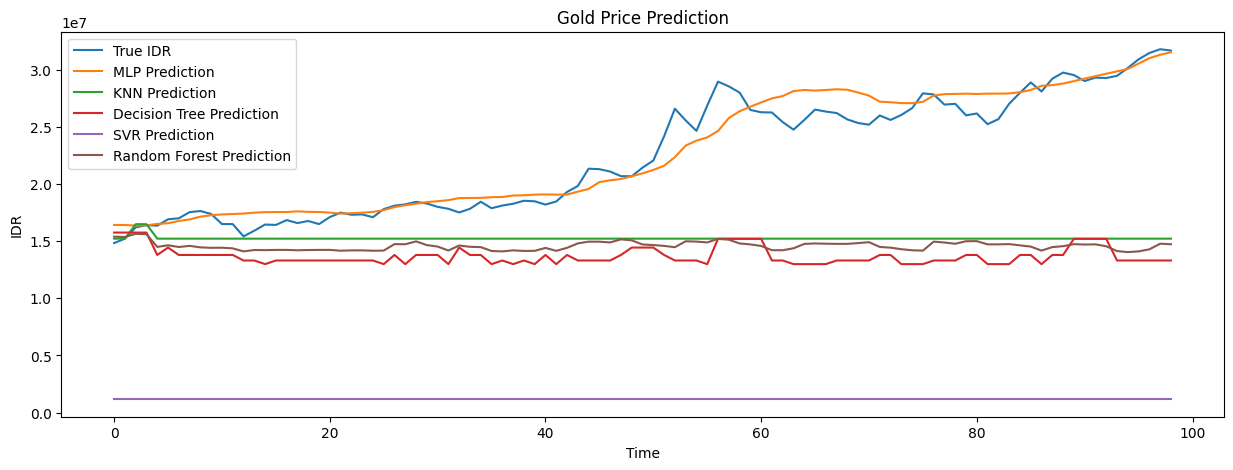

In [134]:
#visualisasi hasil prediksi
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True IDR')
plt.plot(y_pred_mlp, label='MLP Prediction')
plt.plot(y_pred_knn, label='KNN Prediction')
plt.plot(y_pred_dt, label='Decision Tree Prediction')
plt.plot(y_pred_svr, label='SVR Prediction')
plt.plot(y_pred_rf, label='Random Forest Prediction')
plt.xlabel('Time')
plt.ylabel('IDR')
plt.title('Gold Price Prediction')
plt.legend()

In [133]:
# hasil evaluasi model
print('------------------------------------------------')
print('MLP RMSE: ', rmse_mlp)
print('MLP Correlation: ', corr_mlp)
print('------------------------------------------------')
print('KNN RMSE: ', rmse_knn)
print('KNN Correlation: ', corr_knn)
print('------------------------------------------------')
print('Decision Tree RMSE: ', rmse_dt)
print('Decision Tree Correlation: ', corr_dt)
print('------------------------------------------------')
print('SVR RMSE: ', rmse_svr)
print('SVR Correlation: ', corr_svr)
print('------------------------------------------------')
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest Correlation: ', corr_rf)
print('------------------------------------------------')

------------------------------------------------
MLP RMSE:  1371588.8794478956
MLP Correlation:  0.9651286587416926
------------------------------------------------
KNN RMSE:  8864738.836081667
KNN Correlation:  -0.17475144852719027
------------------------------------------------
Decision Tree RMSE:  10182291.063168699
Decision Tree Correlation:  -0.0017616154700820174
------------------------------------------------
SVR RMSE:  21916440.037023727
SVR Correlation:  -0.9519905018404979
------------------------------------------------
Random Forest RMSE:  9379594.590377279
Random Forest Correlation:  0.13257343230535015
------------------------------------------------
